<a href="https://colab.research.google.com/github/JasvinderSingh131198/Python-for-Data-Science/blob/main/Ridge_Lasso_ElasticNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import datasets 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

In [2]:
# Loading pre-defined Boston Dataset
boston_dataset = datasets.load_boston()
#print(boston_dataset.DESCR)

In [3]:
#Load the data and divide into X and Y varaiable
boston_pd = pd.DataFrame(boston_dataset.data) 
boston_pd.columns = boston_dataset.feature_names 
boston_pd_target = np.asarray(boston_dataset.target) 
boston_pd['House Price'] = pd.Series(boston_pd_target) 

# input 
X = boston_pd.iloc[:, :-1] 

#output 
Y = boston_pd.iloc[:, -1] 

print(boston_pd.head()) 


      CRIM    ZN  INDUS  CHAS  ...  PTRATIO       B  LSTAT  House Price
0  0.00632  18.0   2.31   0.0  ...     15.3  396.90   4.98         24.0
1  0.02731   0.0   7.07   0.0  ...     17.8  396.90   9.14         21.6
2  0.02729   0.0   7.07   0.0  ...     17.8  392.83   4.03         34.7
3  0.03237   0.0   2.18   0.0  ...     18.7  394.63   2.94         33.4
4  0.06905   0.0   2.18   0.0  ...     18.7  396.90   5.33         36.2

[5 rows x 14 columns]


In [4]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [5]:
x_train, x_test, y_train, y_test = train_test_split(boston_pd.iloc[:, :-1],
                                                    boston_pd.iloc[:, -1],
                                                    test_size=0.25)

(x_train.shape, y_train.shape,x_test.shape, y_test.shape)

((379, 13), (379,), (127, 13), (127,))

In [6]:
# Apply multiple Linear Regression Model 
lreg = LinearRegression() 
lreg.fit(x_train, y_train) 

# Generate Prediction on test set 
lreg_y_pred = lreg.predict(x_test) 

# calculating Mean Squared Error (mse) 
mean_squared_error = np.mean((lreg_y_pred - y_test)**2) 
print("Mean squared Error on test set : ", mean_squared_error) 

# Putting together the coefficient and their corrsponding variable names 
lreg_coefficient = pd.DataFrame() 
lreg_coefficient["Columns"] = x_train.columns 
lreg_coefficient['Coefficient Estimate'] = pd.Series(lreg.coef_) 
print(lreg_coefficient) 


Mean squared Error on test set :  18.390105844890012
    Columns  Coefficient Estimate
0      CRIM             -0.106130
1        ZN              0.049365
2     INDUS              0.003055
3      CHAS              2.659550
4       NOX            -18.077832
5        RM              3.931217
6       AGE              0.003137
7       DIS             -1.524453
8       RAD              0.310146
9       TAX             -0.011612
10  PTRATIO             -0.904008
11        B              0.009758
12    LSTAT             -0.521523


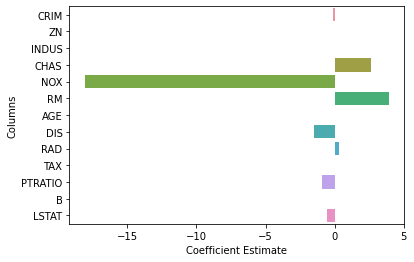

In [7]:
import seaborn as sns

sns.barplot(x='Coefficient Estimate' , y='Columns', data=lreg_coefficient)

In [8]:
# import ridge regression from sklearn library 
from sklearn.linear_model import Ridge 

# Train the model 
ridgeR = Ridge(alpha = 1) 
ridgeR.fit(x_train, y_train) 
y_pred = ridgeR.predict(x_test) 

# calculate mean square error 
mean_squared_error_ridge = np.mean((y_pred - y_test)**2) 
print(mean_squared_error_ridge) 

# get ridge coefficient and print them 
ridge_coefficient = pd.DataFrame() 
ridge_coefficient["Columns"]= x_train.columns 
ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeR.coef_) 
print(ridge_coefficient) 


18.57717538726059
    Columns  Coefficient Estimate
0      CRIM             -0.098765
1        ZN              0.051509
2     INDUS             -0.035776
3      CHAS              2.506551
4       NOX             -9.575954
5        RM              3.957735
6       AGE             -0.003171
7       DIS             -1.409136
8       RAD              0.287421
9       TAX             -0.012099
10  PTRATIO             -0.817104
11        B              0.010050
12    LSTAT             -0.538913


#### import Lasso regression from sklearn library 



In [9]:
from sklearn.linear_model import Lasso 

# Train the model 
lasso = Lasso(alpha = 1) 
lasso.fit(x_train, y_train) 
y_pred1 = lasso.predict(x_test) 

# Calculate Mean Squared Error 
mean_squared_error = np.mean((y_pred1 - y_test)**2) 
print("Mean squared error on test set", mean_squared_error) 
lasso_coeff = pd.DataFrame() 
lasso_coeff["Columns"] = x_train.columns 
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_) 

print(lasso_coeff) 

Mean squared error on test set 21.81967964347384
    Columns  Coefficient Estimate
0      CRIM             -0.052677
1        ZN              0.054390
2     INDUS             -0.004037
3      CHAS              0.000000
4       NOX             -0.000000
5        RM              1.160033
6       AGE              0.021795
7       DIS             -0.698499
8       RAD              0.242809
9       TAX             -0.013827
10  PTRATIO             -0.710383
11        B              0.008200
12    LSTAT             -0.748598


In [10]:
# import model 
from sklearn.linear_model import ElasticNet 

# Train the model 
e_net = ElasticNet(alpha = .4,l1_ratio=.5) 
e_net.fit(x_train, y_train) 

# calculate the prediction and mean square error 
y_pred_elastic = e_net.predict(x_test) 
mean_squared_error = np.mean((y_pred_elastic - y_test)**2) 
print("Mean Squared Error on test set", mean_squared_error) 

e_net_coeff = pd.DataFrame() 
e_net_coeff["Columns"] = x_train.columns 
e_net_coeff['Coefficient Estimate'] = pd.Series(e_net.coef_) 
e_net_coeff 


Mean Squared Error on test set 20.234375287505973


,Columns,Coefficient Estimate
0,CRIM,-0.094691
1,ZN,0.058843
2,INDUS,-0.063150
3,CHAS,0.000000
4,NOX,-0.000000
5,RM,2.062154
6,AGE,0.009778
7,DIS,-1.095761
8,RAD,0.296732
9,TAX,-0.014453
